In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from scipy.optimize import curve_fit


/home/courtade/programs/mambaforge/envs/py3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
data = {'BHET 10.peaks': 0.3199251637043966,
 'BHET 12.peaks': 1.1400535236396074,
 'BHET 14.peaks': 3.6492027334851938,
 'BHET 16.peaks': 5.541199736321688,
 'BHET 18.peaks': 7.459007250418293,
 'BHET 6.peaks': 0.0}

In [5]:
def parse_peaklist(peaklist):
    with open(peaklist, 'r') as f:
        lines = f.readlines()
    H = []
    N = []
    res = []
    
    i=0
    while i < len(lines[3:]):
        line = lines[3:][i]
        next_line = lines[3:][i+1]
        if 'H/N' in next_line:
            H.append(float(line.split()[1]))
            N.append(float(line.split()[2]))
            res.append(int(next_line.split()[-1][1:]))
        i+=2
    
    return np.array(H),np.array(N),np.array(res)     

In [6]:
def calc_delta(H1,H0,N1,N0):
    return ((H1-H0)**2 + ((N1-N0)/6.5)**2)**0.5

In [7]:
def two_site_model(L,KD,Ddmax):
    P = np.zeros(len(L)) + 0.09 # mM 
    return Ddmax * ( (P + L + KD) - ((P + L + KD)**2 - 4*P*L)**0.5 )/(2*P)

In [8]:
df = pd.DataFrame()
for d in data:
    H0,N0,res = parse_peaklist(d)
    sorted_res = [x for x,y,z in sorted(zip(res,H0,N0))]
    sorted_H0 = [y for x,y,z in sorted(zip(res,H0,N0))]
    sorted_N0 = [z for x,y,z in sorted(zip(res,H0,N0))]
    
    if 'res' not in df.columns:
        df['res'] = sorted_res
    else:
        assert sorted_res == list(df['res'].values)
    
    df[d + ' H'] = sorted_H0
    df[d + ' N'] = sorted_N0
    

In [10]:
df2 = pd.DataFrame()
df2['res'] = df['res']
df2['CSP1'] = calc_delta(df['BHET 10.peaks H'],df['BHET 6.peaks H'],df['BHET 10.peaks N'],df['BHET 6.peaks N'])
df2['CSP2'] = calc_delta(df['BHET 12.peaks H'],df['BHET 6.peaks H'],df['BHET 12.peaks N'],df['BHET 6.peaks N'])
df2['CSP3'] = calc_delta(df['BHET 14.peaks H'],df['BHET 6.peaks H'],df['BHET 14.peaks N'],df['BHET 6.peaks N'])
df2['CSP4'] = calc_delta(df['BHET 16.peaks H'],df['BHET 6.peaks H'],df['BHET 16.peaks N'],df['BHET 6.peaks N'])
df2['CSP5'] = calc_delta(df['BHET 18.peaks H'],df['BHET 6.peaks H'],df['BHET 18.peaks N'],df['BHET 6.peaks N'])


In [12]:
target_res = [120, 183, 185, 188]
x = sorted(data.values())
modelx = np.linspace(0,x[-1],num=50)

def get_CSP(residue_nr):
    t = residue_nr
    y = [0]
    for i in range(1,len(df2.columns)):
        y.append(df2[df2['res']==t]['CSP{}'.format(i)].values[0])
    return y

[1.29547127 0.00444369]
[19.76374852  0.12174493]
[11.40654875  0.06828338]
[10.00310381  0.0549735 ]


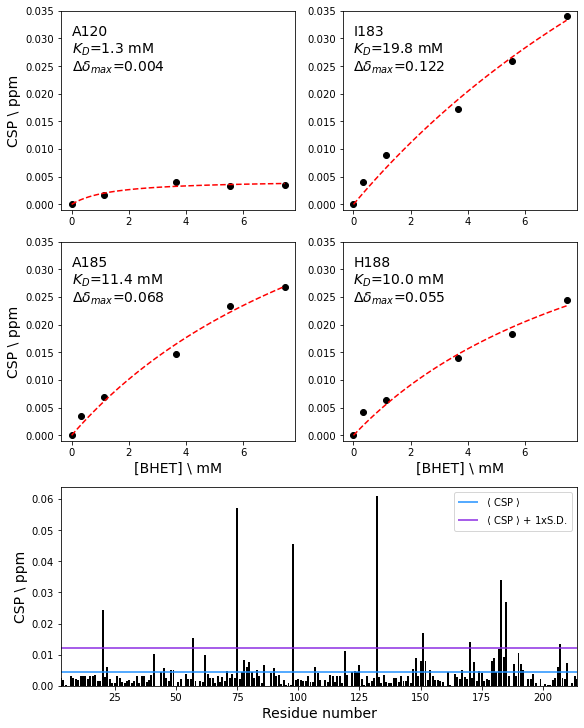

In [16]:
fig, axd = plt.subplot_mosaic([['A', 'B'],['C', 'D'],['E', 'E']], figsize=(8,10), constrained_layout=True)
texty = 0.024
ymin=-0.001
ymax=0.035

y = get_CSP(120)
x = np.array(x)
y = np.array(y)
good_indeces = [0, 2, 3, 4, 5]
axd['A'].plot(x[good_indeces],y[good_indeces],'ko')
popt, pcov = curve_fit(two_site_model, x[good_indeces],y[good_indeces])
print(popt)
axd['A'].plot(modelx, two_site_model(modelx,*popt), 'r--')
axd['A'].text(0,texty, 'A120\n$K_D$={:.1f} mM\n$\Delta \delta${}={:.3f}'.format(popt[0], '$_{max}$', popt[1]), fontsize=14)
axd['A'].set_ylabel('CSP \ ppm', fontsize=14)
axd['A'].set_ylim(ymin,ymax)


y = get_CSP(183)
x = np.array(x)
y = np.array(y)
good_indeces = [0, 1, 2, 3, 4, 5]
axd['B'].plot(x[good_indeces],y[good_indeces],'ko')
popt, pcov = curve_fit(two_site_model, x[good_indeces],y[good_indeces])
print(popt)
axd['B'].plot(modelx, two_site_model(modelx,*popt), 'r--')
axd['B'].text(0,texty, 'I183\n$K_D$={:.1f} mM\n$\Delta \delta${}={:.3f}'.format(popt[0], '$_{max}$', popt[1]), fontsize=14)
axd['B'].set_ylim(ymin,ymax)


y = get_CSP(185)
x = np.array(x)
y = np.array(y)
good_indeces = [0, 1, 2, 3, 4, 5]
axd['C'].plot(x[good_indeces],y[good_indeces],'ko')
popt, pcov = curve_fit(two_site_model, x[good_indeces],y[good_indeces])
print(popt)
axd['C'].plot(modelx, two_site_model(modelx,*popt), 'r--')
axd['C'].text(0,texty, 'A185\n$K_D$={:.1f} mM\n$\Delta \delta${}={:.3f}'.format(popt[0], '$_{max}$', popt[1]), fontsize=14)
axd['C'].set_xlabel('[BHET] \ mM', fontsize=14)
axd['C'].set_ylabel('CSP \ ppm', fontsize=14)
axd['C'].set_ylim(ymin,ymax)


y = get_CSP(20)
x = np.array(x)
y = np.array(y)
good_indeces = [0, 1, 2, 3, 4, 5]
axd['D'].plot(x[good_indeces],y[good_indeces],'ko')
popt, pcov = curve_fit(two_site_model, x[good_indeces],y[good_indeces])
print(popt)
axd['D'].plot(modelx, two_site_model(modelx,*popt), 'r--')
axd['D'].text(0,texty, 'H188\n$K_D$={:.1f} mM\n$\Delta \delta${}={:.3f}'.format(popt[0], '$_{max}$', popt[1]), fontsize=14)
axd['D'].set_xlabel('[BHET] \ mM', fontsize=14)
axd['D'].set_ylim(ymin,ymax)

delta = df2['CSP5']
axd['E'].bar(df2['res'],delta, color='k')
axd['E'].hlines(delta.mean(),0,220,color='dodgerblue', label=r'$\langle$ CSP $\rangle$')
axd['E'].hlines(delta.mean()+delta.std()*1,0,220,color='blueviolet', label=r'$\langle$ CSP $\rangle$ + 1xS.D.')
axd['E'].set_xlim(3,214)
axd['E'].set_xlabel('Residue number', fontsize=14)
axd['E'].set_ylabel('CSP \ ppm', fontsize=14)
axd['E'].legend()

plt.savefig('titration_data2.png', dpi=300)


In [182]:
s = 'select active, resi '
for i in df2[df2['CSP5'] > delta.mean()+delta.std()]['res'].values:
    s = s + str(i) + '+'
print(s)

s = 'select less_active, resi '
for i in df2[(df2['CSP5'] > delta.mean()) & (df2['CSP5'] < delta.mean()+delta.std())]['res'].values:
    s = s + str(i) + '+'
print(s)

select active, resi 20+57+75+98+132+151+170+183+185+207+
select less_active, resi 22+41+45+48+49+62+71+78+79+80+83+86+90+107+119+123+125+147+148+150+152+154+167+172+174+179+180+182+184+188+190+191+192+206+210+
